## 电商购物用户行为分析数据
数据来源：https://tianchi.aliyun.com/dataset/203653


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv(r'C:\Users\jxluo\Downloads\customer_shopping_data.csv')

## 数据探索

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.8+ MB


In [5]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## 数据预处理

In [44]:
df['invoice_date']=pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

## 创建新特征

In [56]:
df['year_month'] = df['invoice_date'].dt.to_period('M')
df['total_amount']=df['price']*df['quantity']

## 年龄分组

In [47]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [48]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year_month,gmv,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Alipay,2022-08-05,2022-08,7502.00,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,WeChat Pay,2021-12-12,2021-12,5401.53,<25
2,I127801,C266599,Male,20,Clothing,1,300.08,Card,2021-11-09,2021-11,300.08,<25
3,I173702,C988172,Female,66,Shoes,5,3000.85,Alipay,2021-05-16,2021-05,15004.25,65+
4,I337046,C189076,Female,53,Books,4,60.60,Card,2021-10-24,2021-10,242.40,45-54


In [24]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

## 月度销售趋势

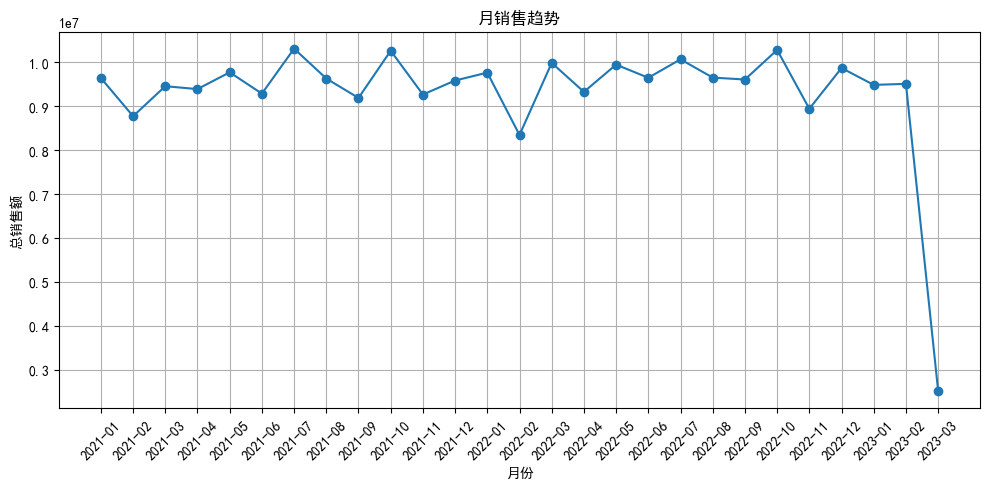

In [58]:
monthly_sales = df.groupby('year_month')['total_amount'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['year_month'].astype(str), monthly_sales['total_amount'], marker='o')
plt.xticks(rotation=45)
plt.title('月度销售趋势')
plt.xlabel('月份')
plt.ylabel('总销售额')
plt.grid(True)
plt.tight_layout()
plt.show()

## 旺季分别有：7月、10月
## 淡季有：2月

## 柱状图：性别 × 年龄组

In [60]:
group_analysis = df.groupby(['gender', 'age_group', 'category']).agg(
        total_sales=('total_amount', 'sum'),
        order_count=('invoice_no', 'nunique'),
        avg_order_value=('total_amount', 'mean')
    ).reset_index()

C:\Users\jxluo\AppData\Local\Temp\ipykernel_24156\464378773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby(['gender', 'age_group', 'category']).agg(


C:\Users\jxluo\AppData\Local\Temp\ipykernel_24156\2999047580.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group_analysis, x='age_group', y='total_sales', hue='gender', ci=None)


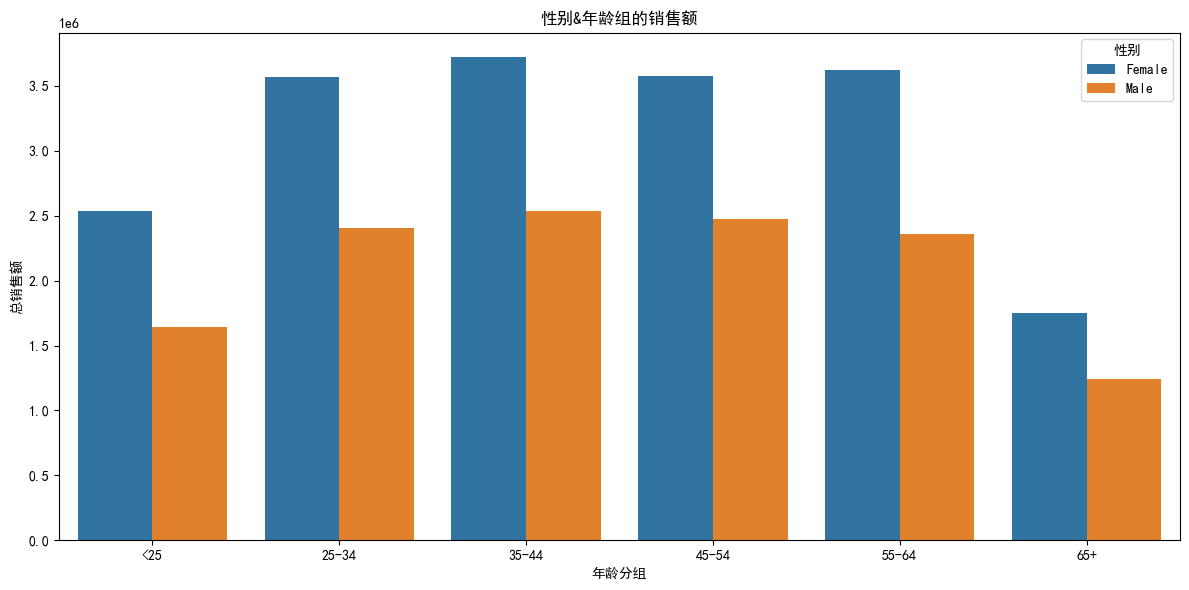

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(data=group_analysis, x='age_group', y='total_sales', hue='gender', ci=None)
plt.title('性别&年龄组的销售额')
plt.ylabel('总销售额')
plt.xlabel('年龄分组')
plt.legend(title='性别')
plt.tight_layout()
plt.show()

In [ ]:
## 女性消费能力大于男性
## 

C:\Users\jxluo\AppData\Local\Temp\ipykernel_24156\2260461992.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


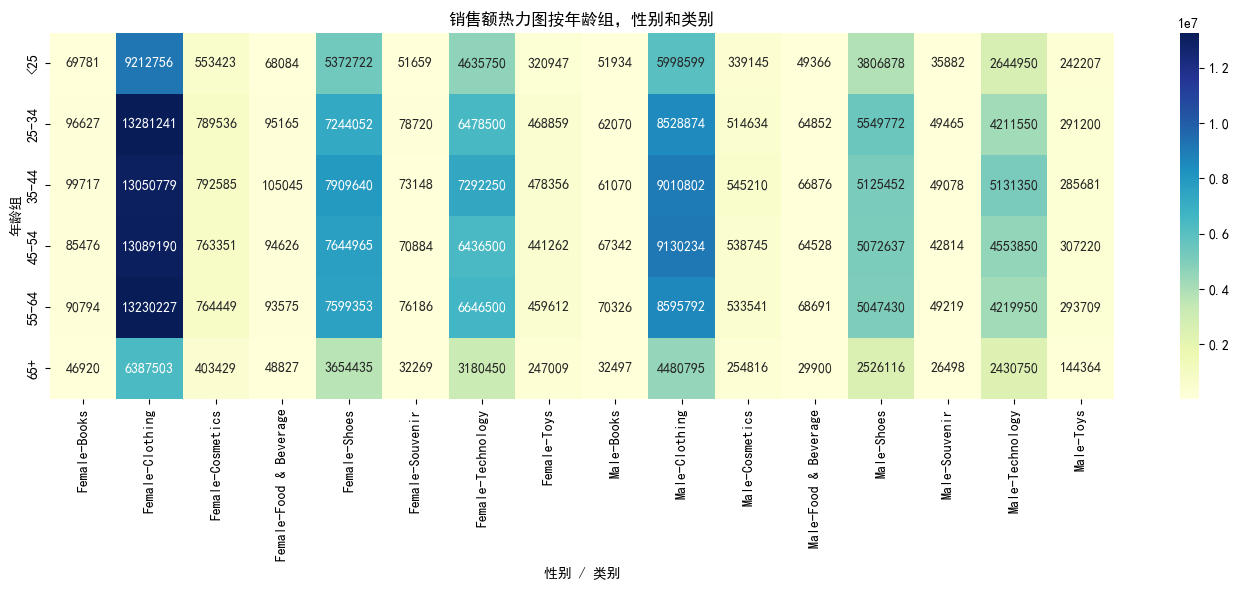

In [63]:
pivot_table = df.pivot_table(
        index=['age_group'],
        columns=['gender', 'category'],
        values='total_amount',
        aggfunc='sum',
        fill_value=0
    )
plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('销售额热力图按年龄组，性别和类别')
plt.ylabel('年龄组')
plt.xlabel('性别 / 类别')
plt.tight_layout()
plt.show()

### 1.女性服装类在 25-64 岁区间持续保持高销售额，是绝对主力品类，其次是鞋类和科技类。
### 2.男性服装类在 25-64 岁区间同样有高销售额。
### 3.年轻群体（<25 岁）在鞋类和服装类的购买力显著，值得早期培养品牌忠诚度。

In [65]:
top10 = group_analysis.sort_values(by='total_sales', ascending=False).head(10)

In [66]:
top10

,gender,age_group,category,total_sales,order_count,avg_order_value
9,Female,25-34,Clothing,13281240.72,4010,3312.030105
33,Female,55-64,Clothing,13230227.12,3983,3321.673894
25,Female,45-54,Clothing,13089189.52,3924,3335.675209
17,Female,35-44,Clothing,13050779.28,4039,3231.190711
1,Female,<25,Clothing,9212756.08,2775,3319.912101
73,Male,45-54,Clothing,9130234.08,2678,3409.348051
65,Male,35-44,Clothing,9010802.24,2710,3325.019277
81,Male,55-64,Clothing,8595791.60,2621,3279.584739
57,Male,25-34,Clothing,8528873.76,2595,3286.656555
20,Female,35-44,Shoes,7909640.43,1153,6860.052411


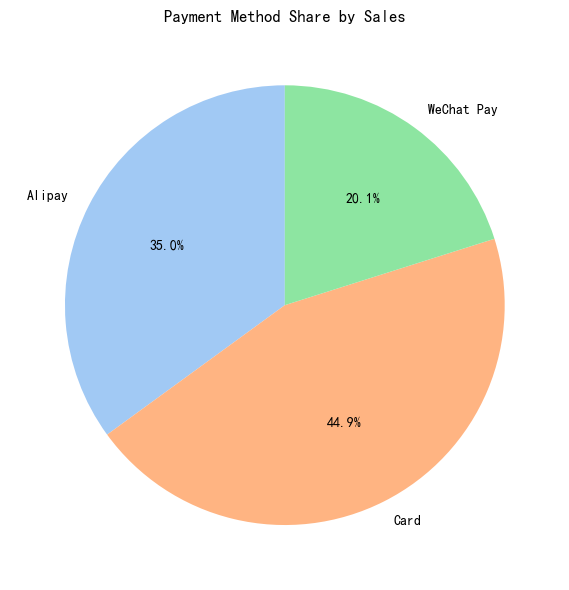

In [67]:
# ===================== 9. 支付方式分析 =====================
payment_sales = df.groupby('payment_method')['total_amount'].sum().reset_index()
payment_sales['percent'] = payment_sales['total_amount'] / payment_sales['total_amount'].sum() * 100

plt.figure(figsize=(6,6))
plt.pie(payment_sales['total_amount'], labels=payment_sales['payment_method'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Payment Method Share by Sales')
plt.tight_layout()
plt.show()
